In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [11]:
# Data Ingestion
csv_path = 'hotel_bookings.csv'
data = pd.read_csv(csv_path)

In [12]:
data.shape

(119390, 32)

In [13]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03/07/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03/07/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06/05/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/2015


In [15]:
data.isna().sum() # Check if missing values exist

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119389 non-null  float64
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handling the missing values of adults.

In [17]:
adults_median = data['adults'].median()

adults_fill = data['adults'].fillna(adults_median,inplace=True)

#### Handling the missing values of children.

In [18]:

children_mean = data['children'].median()
children_mean

children_fill = data['children'].fillna(children_mean,inplace=True)

#### Handling the missing country values

In [19]:
country_mode = data['country'].mode()[0]
country_mode

country_fill = data['country'].fillna(country_mode,inplace=True)

#### Handling the market segment missing values

In [20]:
market_mode = data['market_segment'].mode()[0]
market_mode

market_fill = data['market_segment'].fillna(market_mode,inplace=True)

### Handling the distribution channel missing values

In [21]:
distributionChannel_mode = data['distribution_channel'].mode()[0]
distributionChannel_mode

distributionChannel_fill = data['distribution_channel'].fillna(distributionChannel_mode,inplace=True)

### Handling the reserved room type as well as assigned room type datas and dropping them

In [22]:
data['reserved_room_type'].dropna()

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119389, dtype: object

In [23]:
data.dropna(subset=["assigned_room_type"],inplace=True)

In [24]:
data.dropna(subset=["reserved_room_type"],inplace=True)

In [25]:
data.dropna(subset=["reservation_status"],inplace=True)

### Handling the deposit_type missing values

In [26]:
deposit_value = data['deposit_type'].mode()[0]
deposit_value

data['deposit_type'].fillna(deposit_value,inplace=True)

In [27]:

data['deposit_type'].value_counts()

deposit_type
No Deposit    104649
Non Refund     14576
Refundable       162
Name: count, dtype: int64

### 
Handling the agent missing values

In [28]:
data['agent'].value_counts()

agent_median = data['agent'].median()
agent_median
data['agent'].fillna(agent_median,inplace=True)

In [29]:
data['customer_type'].value_counts()

agent_median = data['customer_type'].mode()[0]
agent_median
data['customer_type'].fillna(agent_median,inplace=True)

In [30]:
data['company'].value_counts()

agent_median = data['company'].median()
agent_median
data['company'].fillna(agent_median,inplace=True)

Calculate summary statistics (mean, median, mode, standard deviation, etc.) for  numerical columns like lead_time, stays_in_weekend_nights, 
stays_in_week_nights, adults, children, babies, previous_cancellations,  previous_bookings_not_canceled, days_in_waiting_list, adr,  
required_car_parking_spaces, and total_of_special_requests. 

### 2.Descriptive Statistics

In [31]:
# Calculation of mean,median,mode,sd of the following columns.
# a. Leat_time
leat_time_mean = data['lead_time'].mean()
print(f"The mean value of lead_time is: ",leat_time_mean)

leat_time_median = data['lead_time'].median()
print("The median value is: ",leat_time_median)

leat_time_mode = data['lead_time'].mode()[0]
print("The mode value is: ",leat_time_mode)

# b. Stays_in_weeking_nights
print("\n")
leat_time_mean = data['stays_in_weekend_nights'].mean()
print(f"The mean value of lead_time is: ",leat_time_mean)

leat_time_median = data['stays_in_weekend_nights'].median()
print("The median value is: ",leat_time_median)

leat_time_mode = data['stays_in_weekend_nights'].mode()[0]
print("The mode value is: ",leat_time_mode)

# c. Stays_in_week_nights
print("\n")
leat_time_mean = data['stays_in_week_nights'].mean()
print(f"The mean value of lead_time is: ",leat_time_mean)

leat_time_median = data['stays_in_week_nights'].median()
print("The median value is: ",leat_time_median)

leat_time_mode = data['stays_in_week_nights'].mode()[0]
print("The mode value is: ",leat_time_mode)

# d. Adults, childrens, babies
print("\n")
adults_mean = data['adults'].median()
adults_mean
# print(f"The mean value of lead_time is: ",leat_time_mean)

# leat_time_median = data['stays_in_week_nights'].median()
# print("The median value is: ",leat_time_median)

# leat_time_mode = data['stays_in_week_nights'].mode()[0]
# print("The mode value is: ",leat_time_mode)

The mean value of lead_time is:  104.01249717305905
The median value is:  69.0
The mode value is:  0


The mean value of lead_time is:  0.9275884309011869
The median value is:  1.0
The mode value is:  0


The mean value of lead_time is:  2.5002973523080403
The median value is:  2.0
The mode value is:  2




2.0

# B
Display value counts and frequencies for categorical columns like hotel, country,  market_segment, distribution_channel, is_repeated_guest,
reserved_room_type,  assigned_room_type, deposit_type, agent, company, customer_type,  reservation_status. 


In [33]:
print("The value counts and frequencies of Different categories are: ")
data['hotel'].value_counts()

print("\n")
data['country'].value_counts().head()

The value counts and frequencies of Different categories are: 




country
PRT    49075
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: count, dtype: int64

<BarContainer object of 119387 artists>

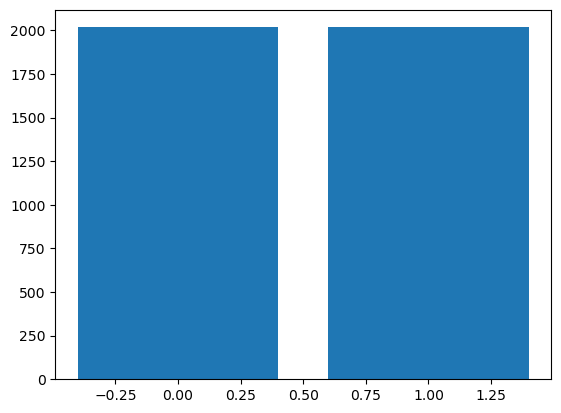

In [40]:
# Creating histogram for is_cancelled and arrival_date_year
is_canceled = data['is_canceled']
# print(is_canceled)

arrival_date_year = data['arrival_date_year']
# print(arrival_date_year)
plt.bar(is_canceled,arrival_date_year)

In [43]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000
mean,0.370426,104.012497,2016.156583,27.165060,15.798345,0.927588,2.500297,1.856400,0.103881,0.007949,0.031913,0.087120,0.137100,0.221121,76.742945,179.584511,2.321208,101.829624,0.062511,0.571360
std,0.482921,106.863978,0.707461,13.605287,8.780902,0.998621,1.908268,0.579268,0.398552,0.097437,0.175769,0.844347,1.497456,0.652309,105.904916,31.501364,17.594938,50.534418,0.245279,0.792805
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,179.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,179.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


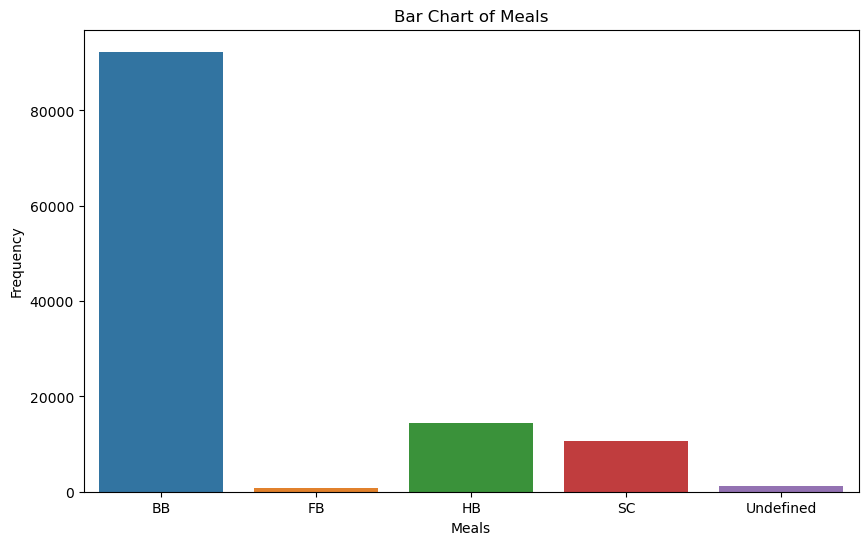

In [45]:
# Bar plot for meal
plt.figure(figsize=(10, 6))
sns.countplot(x=data['meal'])
plt.title('Bar Chart of Meals')
plt.xlabel('Meals')
plt.ylabel('Frequency')
plt.show()

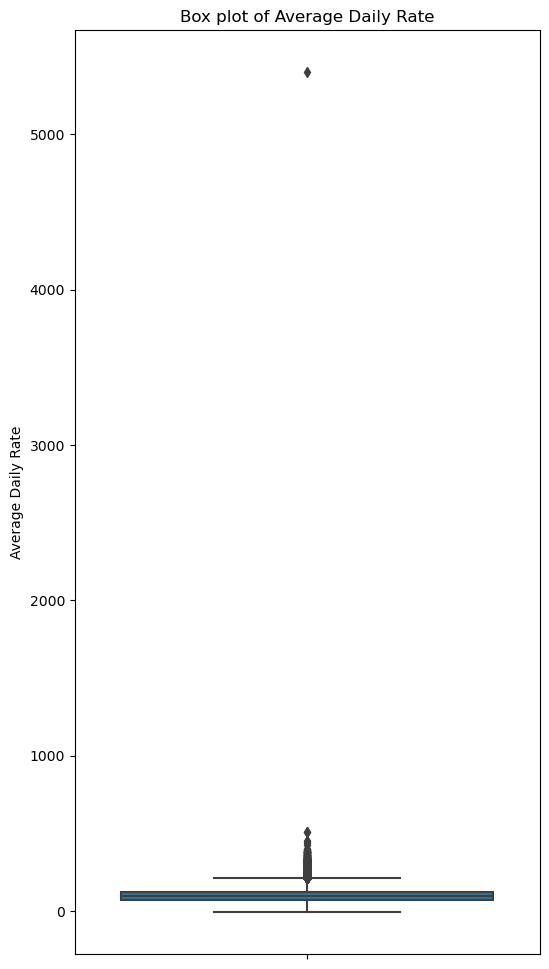

In [46]:
# Box plot of Average Daily Rate
plt.figure(figsize=(6, 12))
sns.boxplot(y=data['adr'])
plt.title('Box plot of Average Daily Rate')
plt.ylabel('Average Daily Rate')
plt.show()

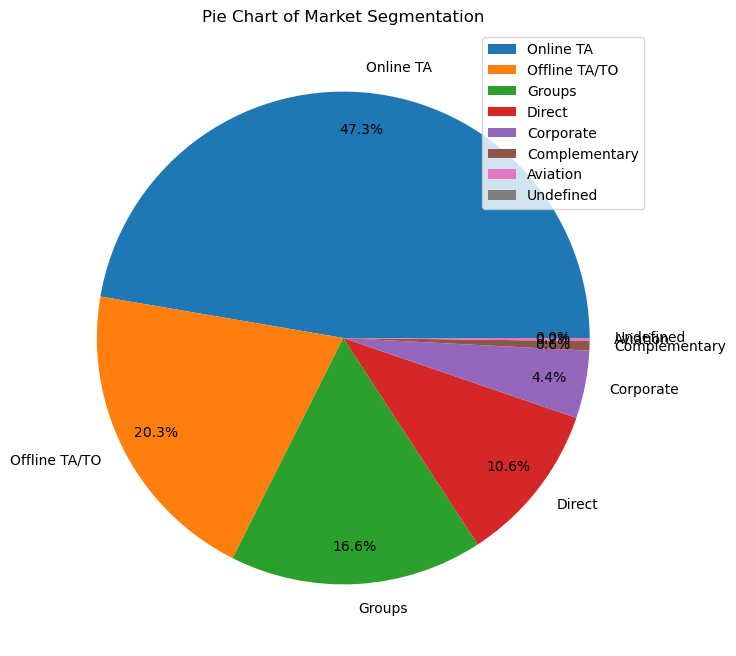

In [47]:
# Pie chart for market segment
plt.figure(figsize=(8, 8))
segments = list(data['market_segment'].value_counts())
plt.pie(segments, 
        labels=data['market_segment'].value_counts().index,
        autopct='%.1f%%', 
        pctdistance=0.85,  # Adjust percentage label distance
       )
plt.title('Pie Chart of Market Segmentation')
plt.legend()
plt.show()

In [48]:
data['market_segment'].value_counts()

market_segment
Online TA        56478
Offline TA/TO    24215
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

showing using a bar char 

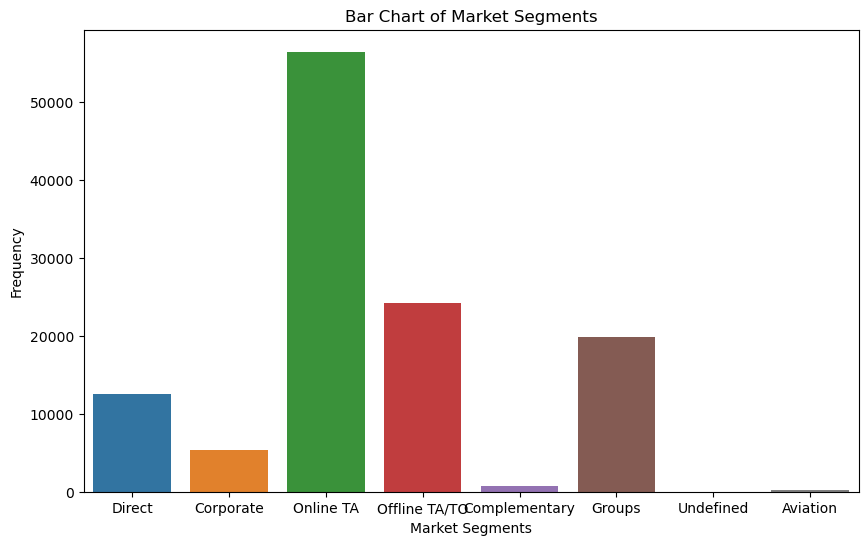

In [49]:
# Bar plot for Market Segments
plt.figure(figsize=(10, 6))
sns.countplot(x=data['market_segment'])
plt.title('Bar Chart of Market Segments')
plt.xlabel('Market Segments')
plt.ylabel('Frequency')
plt.show()

### to find out the relationship between Average Daily Rate and Booking Changes

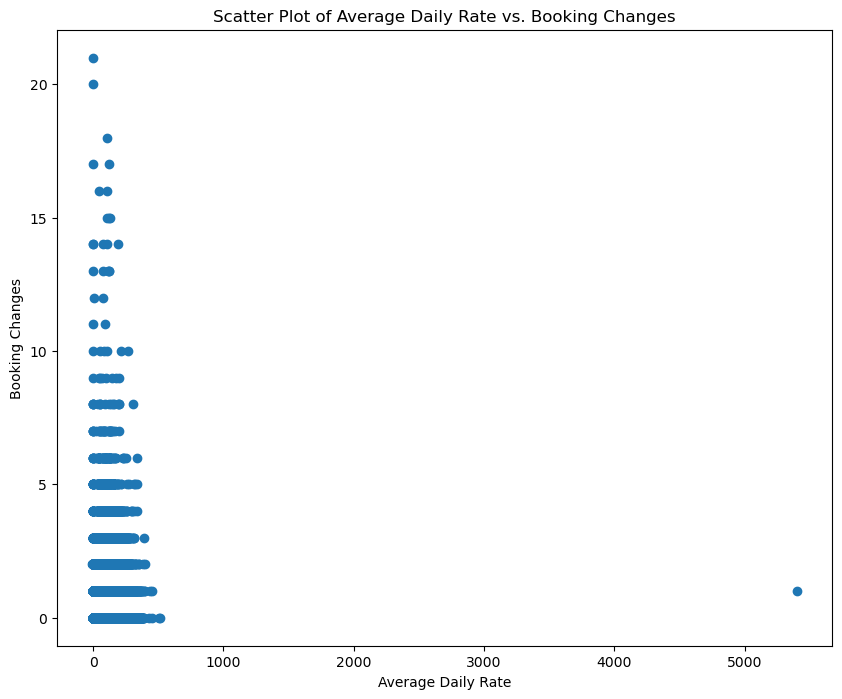

In [50]:
# Scatter plot of: Average Daily Rate vs. Booking Changes (not related)
plt.figure(figsize=(10, 8))
plt.scatter(x=data['adr'], y=data['booking_changes'])
plt.title('Scatter Plot of Average Daily Rate vs. Booking Changes')
plt.xlabel('Average Daily Rate')
plt.ylabel('Booking Changes')
plt.show()

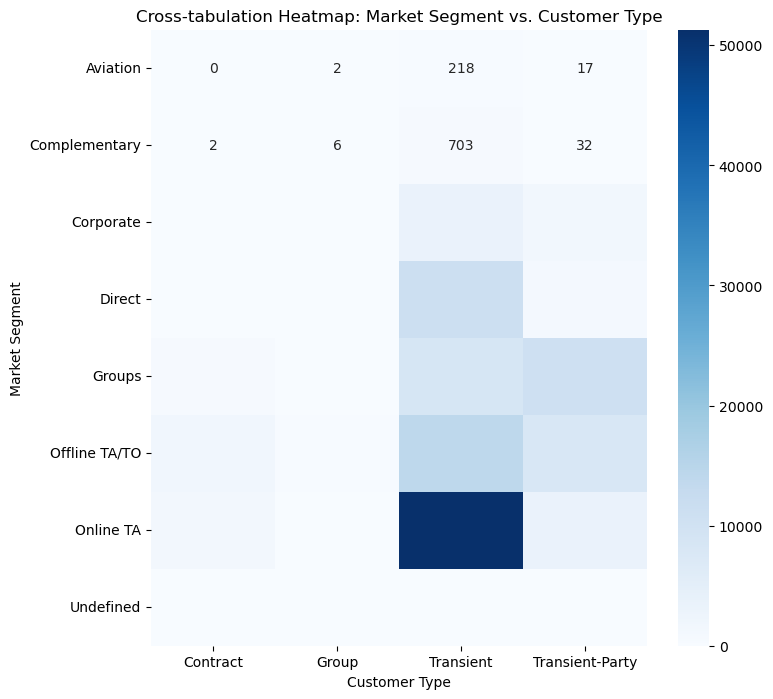

In [51]:
# Example of a cross-tabulation heatmap
cross_tab = pd.crosstab(data['market_segment'], data['customer_type'])
plt.figure(figsize=(8, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-tabulation Heatmap: Market Segment vs. Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Market Segment')
plt.show()

### Correlation Analysis

In [53]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293119,0.016629,0.008155,-0.006139,-0.001783,0.024767,0.060022,0.005047,-0.032493,-0.084798,0.110132,-0.057360,-0.144380,-0.051701,-0.011366,0.054184,0.047582,-0.195490,-0.234658
lead_time,0.293119,1.000000,0.040127,0.126876,0.002260,0.085672,0.165791,0.119522,-0.037609,-0.020916,-0.124412,0.086041,-0.073549,0.000144,-0.020955,0.018571,0.170084,-0.063066,-0.116449,-0.095707
arrival_date_year,0.016629,0.040127,1.000000,-0.540567,-0.000240,0.021515,0.030889,0.029646,0.054663,-0.013196,0.010334,-0.119830,0.029215,0.030881,0.057159,0.061998,-0.056504,0.197643,-0.013640,0.108541
arrival_date_week_number,0.008155,0.126876,-0.540567,1.000000,0.066815,0.018206,0.015562,0.025907,0.005508,0.010396,-0.030129,0.035502,-0.020903,0.005509,-0.019925,-0.022807,0.022934,0.075781,0.001908,0.026146
arrival_date_day_of_month,-0.006139,0.002260,-0.000240,0.066815,1.000000,-0.016354,-0.028185,-0.001563,0.014564,-0.000231,-0.006147,-0.027012,-0.000301,0.010609,0.000399,0.010174,0.022726,0.030267,0.008704,0.003069
stays_in_weekend_nights,-0.001783,0.085672,0.021515,0.018206,-0.016354,1.000000,0.498966,0.091869,0.045796,0.018484,-0.087238,-0.012774,-0.042715,0.063272,0.157571,0.004640,-0.054150,0.049343,-0.018555,0.072677
stays_in_week_nights,0.024767,0.165791,0.030889,0.015562,-0.028185,0.498966,1.000000,0.092977,0.044211,0.020192,-0.097247,-0.013993,-0.048743,0.096189,0.192115,0.032405,-0.002020,0.065257,-0.024852,0.068212
adults,0.060022,0.119522,0.029646,0.025907,-0.001563,0.091869,0.092977,1.000000,0.030437,0.018146,-0.146425,-0.006737,-0.107983,-0.051674,0.016800,0.023998,-0.008283,0.230643,0.014779,0.122883
children,0.005047,-0.037609,0.054663,0.005508,0.014564,0.045796,0.044211,0.030437,1.000000,0.024032,-0.032856,-0.024728,-0.021071,0.048961,0.049097,-0.001202,-0.033270,0.324817,0.056187,0.081727
babies,-0.032493,-0.020916,-0.013196,0.010396,-0.000231,0.018484,0.020192,0.018146,0.024032,1.000000,-0.008943,-0.007501,-0.006551,0.083441,0.030929,0.001401,-0.010621,0.029189,0.037388,0.097889


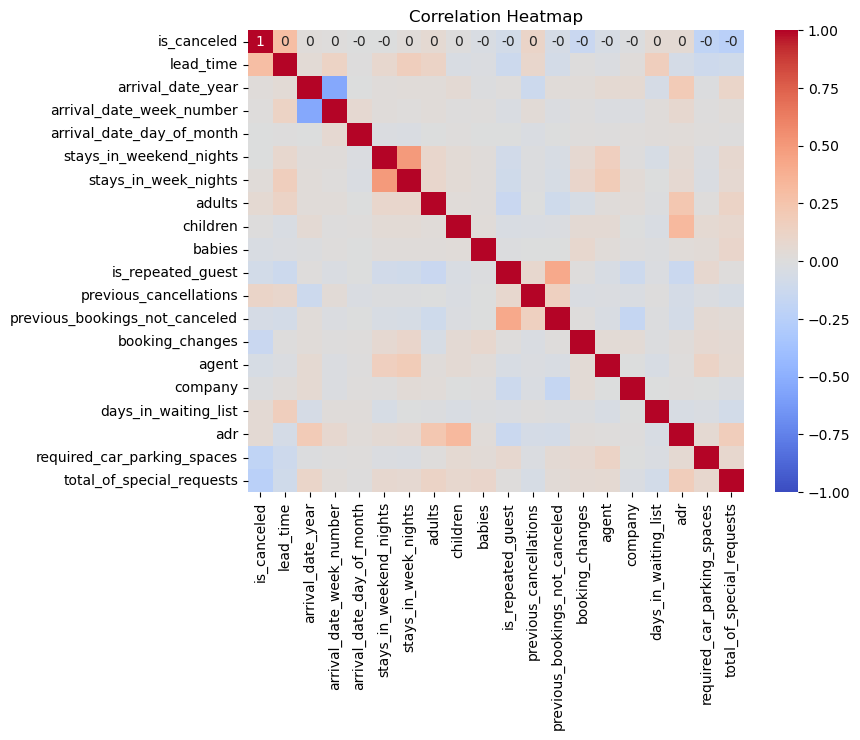

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.0f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Categorical Data Analysis

In [55]:

data.describe(include='category')

ValueError: No objects to concatenate